In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df=pd.read_csv('/content/dataframe_.csv')

In [30]:
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [32]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [33]:
df.shape

(1697, 2)

In [34]:
#null values
df.isnull().sum()

input     1
output    1
dtype: int64

In [35]:
df.dtypes
#only shows datatypes with their columns name in the dataset

input     float64
output    float64
dtype: object

In [36]:
df.isnull()

,input,output
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1692,False,False
1693,False,False
1694,False,False
1695,False,False


In [37]:
df.isnull().sum()

input     1
output    1
dtype: int64

In [38]:
df['input'].value_counts()

-125.366669    11
 112.633331    10
-131.366669     8
-119.366669     8
 80.633331      7
               ..
-14.879573      1
-7.366669       1
 0.106496       1
 0.641190       1
-110.344221     1
Name: input, Length: 991, dtype: int64

In [39]:
df['output'].value_counts()

-95.000000     32
-33.000000     12
-78.000000     12
-32.000000     10
-75.000000     10
               ..
-108.925420     1
-80.761170      1
-89.922634      1
-109.797457     1
 123.087950     1
Name: output, Length: 969, dtype: int64

In [40]:
df['input'].replace(np.nan,-125.366669,inplace= True)
# in this command we are going to replace our null values present in age column which is our numerical column.
# so we are using our second option that is central tendency for filling the null values 
# becoz there is no mentioned at all in the problem statement how to fill the null values

In [41]:
df['output'].replace(np.nan,-95.000000,inplace= True)

In [42]:
df.isnull().sum()

input     0
output    0
dtype: int64

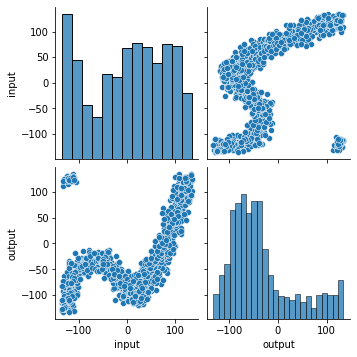

In [43]:
sns.pairplot(df)
#this command allows us to see relation between two columns.

In [44]:
df.corr()
#this command will return the co-relation between columns 

,input,output
input,1.000000,0.512134
output,0.512134,1.000000


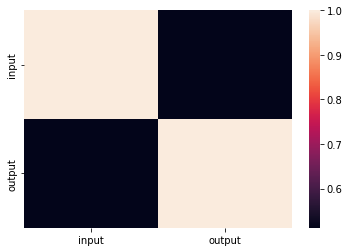

In [45]:
sns.heatmap(df.corr())
# this command use to visualize co-realtion using heat map

In [46]:
df.columns

Index(['input', 'output'], dtype='object')

In [47]:
x = df.drop(['output'] , axis=1)
y = df['output']

In [48]:
x.head()

,input
0,-122.740667
1,-121.531419
2,-134.917019
3,-120.605951
4,-129.894781


In [49]:
y.head()

0   -130.572085
1   -129.938929
2   -130.141832
3   -125.760932
4   -112.785214
Name: output, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [52]:
x_train

,input
801,-122.889442
1679,9.626859
1223,-68.375825
1180,-94.309138
22,-114.410526
...,...
835,-120.366669
1216,-48.536684
1653,-4.688294
559,69.633331


In [53]:
y_train

801     -70.992066
1679   -110.907090
1223    -18.312518
1180    -39.638246
22      -86.814043
           ...    
835     -90.000000
1216    -29.370224
1653    -88.868531
559     -39.000000
684     -86.903348
Name: output, Length: 1357, dtype: float64

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
model =  LinearRegression()

In [56]:
model.fit(x_train,y_train)

LinearRegression()

In [58]:
y_pred = model.predict(x_test)

In [67]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error

In [69]:
mean_absolute_error(y_test,y_pred)

43.297782429836076

In [68]:
mean_squared_error(y_test,y_pred)

3241.4209198364233

In [70]:
import statsmodels.api as sm
x_stats=sm.add_constant(x_train)
x_stats

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,input
801,1.0,-122.889442
1679,1.0,9.626859
1223,1.0,-68.375825
1180,1.0,-94.309138
22,1.0,-114.410526
...,...,...
835,1.0,-120.366669
1216,1.0,-48.536684
1653,1.0,-4.688294
559,1.0,69.633331


In [71]:
summary_model=sm.OLS(y_train,x_stats).fit()
print(summary_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     455.4
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           2.44e-87
Time:                        11:24:39   Log-Likelihood:                -7396.8
No. Observations:                1357   AIC:                         1.480e+04
Df Residuals:                    1355   BIC:                         1.481e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.7851      1.531    -22.716      0.0

In [73]:
from sklearn.linear_model import Ridge
rid=Ridge()
rid.fit(x_train,y_train)

Ridge()

In [78]:
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_test)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [80]:
#calculating mse
mse = np.mean((y_pred - y_test)**2)
mse 

3241.4209198364233